## Calzada Jasso Andres Geovani *<span style = "color : Blue" > 23265539 </span>*

### *<span style = "color : #E3182E" >Práctica 3: Sensado y análisis inercial</span>*

#### *<span style = "color : #01A9DB" >Evaluacion de rutina de ejerciacio</span>*

En el curso de CDSI se realizó la siguiente práctica, en la cual se llevo a cabo la recolección de datos. 

El primer paso consta de la recoleccion de datos inerciales. Donde se debe de tener una escenario de recoleción donde se realizará una rutina de ejercicio de bajo impacto, se colocarán 5 IMUs en las extreminades inferiores y espalda baja, ademas de grabar un video para poder realizar el etiquetado de los datos.

El segundo paso es tener datos de referencia, donde un experto también realizará la rutina y sus datos sersn utiliazados como gold standard.
Así también se clasificaran los videos tomados por el experto para definir que tan bien se realizaron las repeticiones. 

El tercer paso es Extracción y selección de características donde s debra de tener un enfoque de segmentado para los datos es decir por repeticiones. Donde se deben de extraer  características de cada segmento, se recomiendo que se haga uso de la librería TSFEL. Se recomienda realizar extracción de características.

El cuarto paso es la construcción y evalución de modelos, donde se debe de genrar un modelo para determinar si la rutina fue realizada correctamente. Se debe de evaluar el modelo urilizando validación cruzada y analizara los datos mal clasficados. 

El quinto paso es la validación externa, donde se provera un dataset no etiquetado para evaluar el modelo final.

<img src="https://www.shutterstock.com/image-photo/portrait-confident-asian-fitness-woman-260nw-761088433.jpg">

# **<span style="color:#0000FF">1. Recolección de datos Inerciales</span>**

En esta sección vamos definir las ruta de los archivos .csv donde se tiene los datos recolatados inerciales, estos datos se encuentran separados por persona, donde primero se van a leer todos los archivos para después unirlos en un sólo archivo .csv con todos los datos.

También en este puto se hará el análisis exploratorio de los archivos y se elimanaran features recolectadas las cuales no tengan importancia para el entrenamiento.

In [ ]:
import pandas as pd 

In [ ]:
# Lista de nombres de archivo
nombres_archivos = ['Andres', 'Andrea', 'Ariana', 'Arturo', 'Cristian', 'Juan', 'Leydy', 'Rachel', 'Scarlett']

# Diccionario para almacenar los DataFrames
archivos = {}

# Ciclo para cargar cada archivo CSV en el diccionario
for nombre in nombres_archivos:
    ruta_archivo = f'Datos/{nombre}.csv'  # Construye la ruta del archivo
    archivos[nombre] = pd.read_csv(ruta_archivo)  # Carga el archivo y lo almacena en el diccionario


In [ ]:
archivo_andres = archivos['Andres']
archivo_andrea = archivos['Andrea']
archivo_ariana = archivos['Ariana']
archivo_arturo = archivos['Arturo']
archivo_cristian = archivos['Cristian']
archivo_juan = archivos['Juan']
archivo_leydy = archivos['Leydy']
archivo_rachel = archivos['Rachel']
archivo_scarlett = archivos['Scarlett']

Del siguiente DataFrame podemos obervar que las columnas correspondientes a:

1. FrameNumber
2. Presure(kPa)
3. Altitude(m)
4. Temperature (degC)
5. HeaveMotion (m)

Son columnas que no nos van a proporcionar informaciín relevante para nuestra clasificación, por lo que vamos a proceder a eliminarlas

In [ ]:
archivo_andres.info()

In [ ]:
archivo_andres = archivo_andres.drop([' FrameNumber', ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',' HeaveMotion (m)'], axis =1)
archivo_andrea = archivo_andrea.drop([' FrameNumber', ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',' HeaveMotion (m)'], axis =1)
archivo_ariana = archivo_ariana.drop([' FrameNumber', ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',' HeaveMotion (m)'], axis =1)
archivo_arturo = archivo_arturo.drop([' FrameNumber', ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',' HeaveMotion (m)'], axis =1)
archivo_cristian = archivo_cristian.drop([' FrameNumber', ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',' HeaveMotion (m)'], axis =1)
archivo_juan = archivo_juan.drop([' FrameNumber', ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',' HeaveMotion (m)'], axis =1)
archivo_leydy = archivo_leydy.drop([' FrameNumber', ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',' HeaveMotion (m)'], axis =1)
archivo_rachel = archivo_rachel.drop([' FrameNumber', ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',' HeaveMotion (m)'], axis =1)
archivo_scarlett = archivo_scarlett.drop([' FrameNumber', ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',' HeaveMotion (m)'], axis =1)

In [ ]:
#Imprimimos un DataFrame al azar para obervar si ya eliminaron de mnaera correcta las columnas de las cuales no se tiene interes 
archivo_cristian.info()

Una vez que ya tenemos acomodados nuestras fetaures más relevantes, vamos a proceder a concatenar todos los DataFrames en uno solo y guardarlo en un nuevo archivo .csv para que este pueda ser leido nuevamnete sin necesidad de correr todo el script.


In [ ]:
df = pd.concat([archivo_andrea,archivo_andres, archivo_ariana, archivo_arturo, archivo_cristian, archivo_juan, archivo_leydy, archivo_rachel, archivo_scarlett], ignore_index=True)
df.head()

In [ ]:
df.to_csv('FULL.csv')

# **<span style="color:#0000FF">2.Datos de referencia y etiquetado</span>**

In [ ]:
# Leemos el archivo de testing.csv
testing = pd.read_csv('Datos/testing.csv')

In [ ]:
#De igual manera vamos a eliminar las columnas que no nos generan importancia
testing = testing.drop([' FrameNumber', ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',' HeaveMotion (m)'], axis =1)

# **<span style="color:red">Correr a partir de aquí el scrip</span>**

Favor de descargar la carpeta de <span style="color:red">Datos</span> que se encuentra en GitHub para que se pueda ejecutar bien el scrip. :)

# **<span style="color:#0000FF">Evaluación de sentadillas por medio de Machine Learning</span>**

# **<span style="color:#0000FF">3. Extracción y selección de características</span>**

En esta sección se van a extraer las características de los segmentos, donde se recomienda usar selección de características

Vamos a comenzar leyendo nuestro archivo .csv donde se tienen todas las características de todos los participantes 

In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
#Leemos el archivo completo FULL.csv
df = pd.read_csv('FULL.csv')
df.head()

,Unnamed: 0,SensorId,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ,LinAccX (g),LinAccY (g),LinAccZ (g),Class
0,0,1,0.00,0.066376,-0.999555,0.080106,-0.186473,0.771407,-1.015720,-47.033031,...,-0.257393,-0.199440,0.999995,-0.001200,0.002248,0.001738,-0.000798,0.004874,0.004934,2
1,1,1,0.01,0.058749,-1.001864,0.082250,-0.363923,0.525834,-0.746620,-47.091492,...,-0.250344,-0.193396,0.999996,-0.001171,0.002187,0.001685,0.007115,0.006890,0.006854,2
2,2,1,0.02,0.052185,-1.004004,0.081673,0.067433,0.339616,-0.618345,-46.448406,...,-0.432559,-0.197299,0.999990,-0.001620,0.003778,0.001716,0.013101,0.005960,0.008488,2
3,3,1,0.03,0.047747,-1.008838,0.079371,0.327756,-0.387092,-0.698904,-46.769951,...,-0.425295,-0.200849,0.999990,-0.001646,0.003714,0.001747,0.015503,0.002597,0.012837,2
4,4,1,0.04,0.054218,-1.010572,0.075375,0.405733,-0.820462,-0.853799,-46.769951,...,-0.416158,-0.208649,0.999990,-0.001677,0.003635,0.001815,0.009297,-0.001565,0.014723,2


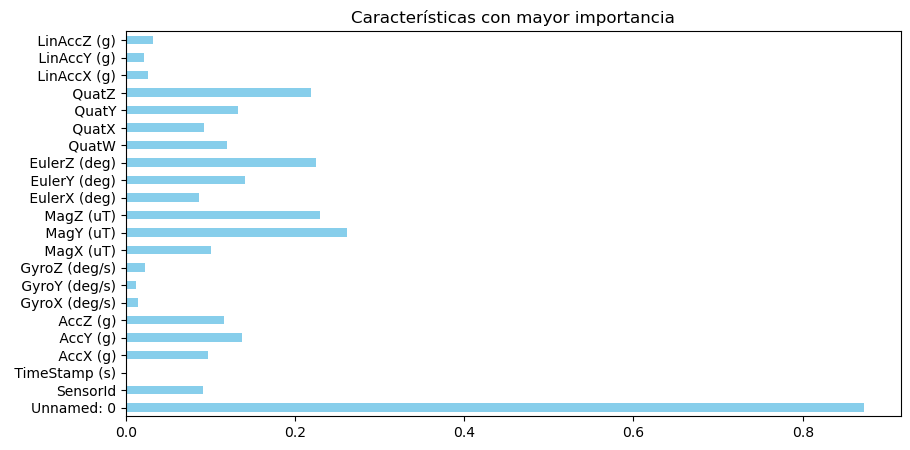

In [2]:
#El primer paso que vamos a realizar es ver cuales son las características más importantes 
#Observamos la ganancia de información de cada atributo con respecto a la clase
x_nueva = mutual_info_classif(df.iloc[:,0:-1], df.iloc[:,-1])
feat_imp = pd.Series(x_nueva, df.columns[0:len(df.columns)-1])
fig, ax = plt.subplots(figsize=(10, 5))
# Crea el gráfico de barras horizontales
feat_imp.plot(ax=ax, title="Características con mayor importancia", kind='barh', color = 'skyblue')
plt.show()

Dado que en el gráfico anterior se muestran las características con mayor importancia, vamos a realiza nuevamente una eliminación de features por medio de .drop para solamente qudarnos con las features con mayor importancia.

In [3]:
#Elimnamos las columnas con menos importancia
df = df.drop(['Unnamed: 0',' TimeStamp (s)',' GyroX (deg/s)', ' GyroY (deg/s)', ' GyroZ (deg/s)', ' LinAccX (g)', ' LinAccY (g)', ' LinAccZ (g)'], axis=1)

Ahora que ya tenemos el DataFrame con las features que son más relevantes para la extracción de caracterísiticas, vamos a entrenar modelos para poder realizar predicciones, este enfoque lo haremos de la siguiente manera:

Vamos a entrenar los modelos con respecto a los sensores, es decir, vamos a entrenar un modelo con los datos sel sensor1, sensor 2, sensor 3, sensor 4 y sensor 5. Para que podamos determinar que sensor funciona mejor para poder realizar la clasificación de las tareas que estamos realizando.


#### *<span style = "color : #01A9DB" >Para el $Sensor_1$</span>*

In [4]:
#Separamos nuestro dataFrame con respecto del sensor 1
df1 = df[df['SensorId'] == 1]
#Separamos nuestras features de nuestra clase
X_s1 = df1.iloc[:,1:-1]

#Separamos nuestra clase
Y_s1  = df1.iloc[:,-1]

#### *<span style = "color : #01A9DB" >Para el $Sensor_2$</span>*

In [5]:
#Separamos nuestro dataFrame con respecto del sensor 1

df2 = df[df['SensorId'] == 2]
#Separamos nuestras features de nuestra clase
X_s2 = df2.iloc[:,1:-1]

#Separamos nuestra clase
Y_s2  = df2.iloc[:,-1]

#### *<span style = "color : #01A9DB" >Para el $Sensor_3$</span>*

In [6]:
#Separamos nuestro dataFrame con respecto del sensor 1

df3 = df[df['SensorId'] == 3]
#Separamos nuestras features de nuestra clase
X_s3 = df3.iloc[:,1:-1]

#Separamos nuestra clase
Y_s3  = df3.iloc[:,-1]

#### *<span style = "color : #01A9DB" >Para el $Sensor_4$</span>*

In [7]:
#Separamos nuestro dataFrame con respecto del sensor 1

df4 = df[df['SensorId'] == 1]
#Separamos nuestras features de nuestra clase
X_s4 = df4.iloc[:,1:-1]

#Separamos nuestra clase
Y_s4  = df4.iloc[:,-1]

#### *<span style = "color : #01A9DB" >Para el $Sensor_5$</span>*

In [8]:
#Separamos nuestro dataFrame con respecto del sensor 1

df5 = df[df['SensorId'] == 1]
#Separamos nuestras features de nuestra clase
X_s5 = df5.iloc[:,1:-1]

#Separamos nuestra clase
Y_s5 = df5.iloc[:,-1]

### **<span style="color:green">Comenzamos con los clasificadores del $Sensor_1$</span>.**

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [10]:
#Dividimos nuestro DataFrame en conjuntos para entrenamiento y para prueba
x_train, x_test, y_train, y_test = train_test_split(X_s1, Y_s1, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((14406, 13), (14406,), (4802, 13), (4802,))

#### **<span style="color:purple">Árboles de decisión</span>.**

In [11]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
print("Decision tree score: {:.3f}".format(accuracy_score(y_test, y_pred)))

#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clf1, x_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 

Decision tree score: 0.977
Confusion Matrix : 
 [[2131    0  136]
 [   0 3162   64]
 [ 102   63 8748]]


#### **<span style="color:purple">Naive Bayes</span>.**

In [12]:
clasificador2 = GaussianNB()

#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador2, x_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

Confusion Matrix : 
 [[1015  250 1002]
 [   0 2385  841]
 [1035 1078 6800]]
Test accuracy =  0.7080383173677635


#### **<span style="color:purple">Random Forest</span>.**

In [13]:
clf3 = RandomForestClassifier()
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("Random Forest score: {:.3f}".format(accuracy_score(y_test,y_pred)))

Random Forest score: 0.989


### **<span style="color:green">Comenzamos con los clasificadores del $Sensor_2$</span>.**

In [14]:
#Dividimos nuestro DataFrame en conjuntos para entrenamiento y para prueba
x_train, x_test, y_train, y_test = train_test_split(X_s2, Y_s2, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11891, 13), (11891,), (3964, 13), (3964,))

#### **<span style="color:purple">Árboles de decisión</span>.**

In [15]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
print("Decision tree score: {:.3f}".format(accuracy_score(y_test, y_pred)))

#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clf1, x_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 

Decision tree score: 0.982
Confusion Matrix : 
 [[1263    8   63]
 [   7 3140   48]
 [  71   44 7247]]


#### **<span style="color:purple">Naive Bayes</span>.**

In [16]:
clasificador2 = GaussianNB()

#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador2, x_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

Confusion Matrix : 
 [[1064    0  270]
 [1039 1943  213]
 [1707    3 5652]]
Test accuracy =  0.7281977966529308


#### **<span style="color:purple">Random Forest</span>.**

In [17]:
clf3 = RandomForestClassifier()
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("Random Forest score: {:.3f}".format(accuracy_score(y_test,y_pred)))

Random Forest score: 0.994


### **<span style="color:green">Comenzamos con los clasificadores del $Sensor_3$</span>.**

In [18]:
#Dividimos nuestro DataFrame en conjuntos para entrenamiento y para prueba
x_train, x_test, y_train, y_test = train_test_split(X_s3, Y_s3, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7316, 13), (7316,), (2439, 13), (2439,))

#### **<span style="color:purple">Árboles de decisión</span>.**

In [19]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
print("Decision tree score: {:.3f}".format(accuracy_score(y_test, y_pred)))

#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clf1, x_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 

Decision tree score: 0.983
Confusion Matrix : 
 [[ 656   54]
 [  48 6558]]


#### **<span style="color:purple">Naive Bayes</span>.**

In [20]:
clasificador2 = GaussianNB()

#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador2, x_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

Confusion Matrix : 
 [[ 710    0]
 [2835 3771]]
Test accuracy =  0.6124931656642975


#### **<span style="color:purple">Random Forest</span>.**

In [21]:
clf3 = RandomForestClassifier()
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("Random Forest score: {:.3f}".format(accuracy_score(y_test,y_pred)))

Random Forest score: 0.995


### **<span style="color:green">Comenzamos con los clasificadores del $Sensor_4$</span>.**

In [22]:
#Dividimos nuestro DataFrame en conjuntos para entrenamiento y para prueba
x_train, x_test, y_train, y_test = train_test_split(X_s4, Y_s4, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((14406, 13), (14406,), (4802, 13), (4802,))

#### **<span style="color:purple">Árboles de decisión</span>.**

In [23]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
print("Decision tree score: {:.3f}".format(accuracy_score(y_test, y_pred)))

#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clf1, x_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 

Decision tree score: 0.978
Confusion Matrix : 
 [[2121    0  146]
 [   1 3165   60]
 [ 107   70 8736]]


#### **<span style="color:purple">Naive Bayes</span>.**

In [24]:
clasificador2 = GaussianNB()

#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador2, x_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

Confusion Matrix : 
 [[1015  250 1002]
 [   0 2385  841]
 [1035 1078 6800]]
Test accuracy =  0.7080383173677635


#### **<span style="color:purple">Random Forest</span>.**

In [25]:
clf3 = RandomForestClassifier()
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("Random Forest score: {:.3f}".format(accuracy_score(y_test,y_pred)))

Random Forest score: 0.990


### **<span style="color:green">Comenzamos con los clasificadores del $Sensor_5$</span>.**

In [26]:
#Dividimos nuestro DataFrame en conjuntos para entrenamiento y para prueba
x_train, x_test, y_train, y_test = train_test_split(X_s5, Y_s5, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((14406, 13), (14406,), (4802, 13), (4802,))

#### **<span style="color:purple">Árboles de decisión</span>.**

In [27]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
print("Decision tree score: {:.3f}".format(accuracy_score(y_test, y_pred)))

#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clf1, x_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 

Decision tree score: 0.978
Confusion Matrix : 
 [[2129    0  138]
 [   0 3168   58]
 [ 105   67 8741]]


#### **<span style="color:purple">Naive Bayes</span>.**

In [28]:
clasificador2 = GaussianNB()

#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador2, x_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

Confusion Matrix : 
 [[1015  250 1002]
 [   0 2385  841]
 [1035 1078 6800]]
Test accuracy =  0.7080383173677635


#### **<span style="color:purple">Random Forest</span>.**

In [ ]:
clf3 = RandomForestClassifier()
clf3 = clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print("Random Forest score: {:.3f}".format(accuracy_score(y_test,y_pred)))

# **<span style="color:#0000FF">5. Validación externa</span>**

In [ ]:
testing = pd.read_csv('Datos/validacion.csv')

In [ ]:
testing = testing.drop([' TimeStamp (s)',' GyroX (deg/s)', ' GyroY (deg/s)', ' GyroZ (deg/s)', ' LinAccX (g)', ' LinAccY (g)', ' LinAccZ (g)',' FrameNumber',' Pressure (kPa)',' Altitude (m)', ' Temperature (degC)', ' HeaveMotion (m)' ],axis=1)

In [ ]:
#Sensor 1
test1 = testing[testing['SensorId'] == 1]
Prueba1 = test1.iloc[:,1:]

In [ ]:
#Sensor 2
test2 = testing[testing['SensorId'] == 2]
Prueba2 = test2.iloc[:,1:]

In [ ]:
#Sensor 3
test3 = testing[testing['SensorId'] == 3]
Prueba3 = test3.iloc[:,1:]

In [ ]:
#Sensor 4
test4 = testing[testing['SensorId'] == 4]
Prueba4 = test4.iloc[:,1:]

Entrenamos el clasificador con los datos de cada sensor 

In [ ]:
clF1 = DecisionTreeClassifier()
clF1.fit(X_s1, Y_s1)

In [ ]:
clF2 = DecisionTreeClassifier()
clF2.fit(X_s2, Y_s2)

In [ ]:
clF3 = DecisionTreeClassifier()
clF3.fit(X_s3, Y_s3)

In [ ]:
clF4 = DecisionTreeClassifier()
clF4.fit(X_s4, Y_s4)

Predicción del sensor 1

In [ ]:
prediccion_sensor1 = clF1.predict(Prueba1)
print('La predicción de la primer sentadilla es: ', np.round(np.mean(prediccion_sensor1[0:146])))
print('La predicción de la segunda sentadilla es: ', np.round(np.mean(prediccion_sensor1[147:294])))
print('La predicción de la tercer sentadilla es: ', np.round(np.mean(prediccion_sensor1[295:442])))
print('La predicción de la cuarta sentadilla es: ', np.round(np.mean(prediccion_sensor1[443:588])))
print('La predicción de la quinta sentadilla es: ', np.round(np.mean(prediccion_sensor1[589:744])))

Predicción del sensor 2

In [ ]:
prediccion_sensor2 = clF2.predict(Prueba2)
print('La predicción de la primer sentadilla es: ', np.round(np.mean(prediccion_sensor2[0:131])))
print('La predicción de la segunda sentadilla es: ', np.round(np.mean(prediccion_sensor2[132:263])))
print('La predicción de la tercer sentadilla es: ', np.round(np.mean(prediccion_sensor2[264:395])))
print('La predicción de la cuarta sentadilla es: ', np.round(np.mean(prediccion_sensor2[396:527])))
print('La predicción de la quinta sentadilla es: ', np.round(np.mean(prediccion_sensor2[528:656])))

Predicción del sensor 3

In [ ]:
prediccion_sensor3 = clF3.predict(Prueba3)
print('La predicción de la primer sentadilla es: ', np.round(np.mean(prediccion_sensor3[0:128])))
print('La predicción de la segunda sentadilla es: ', np.round(np.mean(prediccion_sensor3[129:257])))
print('La predicción de la tercer sentadilla es: ', np.round(np.mean(prediccion_sensor3[258:386])))
print('La predicción de la cuarta sentadilla es: ', np.round(np.mean(prediccion_sensor3[387:515])))
print('La predicción de la quinta sentadilla es: ', np.round(np.mean(prediccion_sensor3[516:644])))

Predicción del sensor 4

In [ ]:
prediccion_sensor4 = clF4.predict(Prueba4)
print('La predicción de la primer sentadilla es: ', np.round(np.mean(prediccion_sensor4[0:103])))
print('La predicción de la segunda sentadilla es: ', np.round(np.mean(prediccion_sensor4[104:207])))
print('La predicción de la tercer sentadilla es: ', np.round(np.mean(prediccion_sensor4[208:311])))
print('La predicción de la cuarta sentadilla es: ', np.round(np.mean(prediccion_sensor4[312:415])))
print('La predicción de la quinta sentadilla es: ', np.round(np.mean(prediccion_sensor4[416:516])))

# **<span style="color:#0000FF">6 Conclusión del Método 1</span>**

Si bien realizar una clasificación sobre una persona realizando ejercicio por medio de Machine Learning es relativamente fácil entrenando un modelo para hacer una predicción, existen otros métodos para que podamos conocer como es que las persona realizan los ejercicios. 
Así los resultados obtenidos por medio de Machine Learning donde el ejercicio realizado de manera correcta se califa de la siguiente manera:

* 0 ---> Ejercicio mal realizado 
* 1 ---> Ejercicio relizando medianamente bien 
* 2 ---> Ejercicio bien realizado 

Los resultados obtenidos por medio de las técnicas de clasificación de las 5 repeticiones fueron:

|Clasificador | Rep1 | Rep2| Rep3| Rep4| Rep5|
|-------------|------|-----|-----|-----|-----|
| Sensor 1    |   2  |  2  | 2   |   2 | 1   |
| Sensor 2    | 2    | 2   | 1   |  1  | 2   |
| Sensor 3    |  2   |  2  |  2  |  1  |  1  |
| Sensor 4    |  2   |  2  |  2  |  2  |  2  |

Datos estos resultados del archivo de validación.csv podemos observar que no en todos los casos se tuvo la misma predicción, pues a pesar de que para la repetición 1 y 2 los 4 sensores obtuvieron el mismo resultados, no es el mismo caso para la repeticioón 3, 4 y 5, ya que en esas repeteciones los valores fueron distintos, debido a que se parte de la suposición de que los 5 sensores estan colocados en la misma persona, con la misma orientación, entonces existe confusión en la manera de como el modelo reconoce los patrones para poder detecar la calidad de la repeteción.

Si bien como se menciono antes, esta es una de las formas en las cuales se puede hacer una predicción existen otras maneras de poder observar como se realizan los ejercicios.

# **<span style="color:#0000FF">Análisis por medio de comparación de gráficas</span>**

## **<span style="color:#0000FF">Sin Machine Learning</span>**

Comenzamos escogiendo uno de los sensores por cada archivo .csv de todos los participantes, este caso comenzamos eligiendo el sensor número 1 y vamos a elegir una de las características obtenidas directamente de los sensores.

Para este tipo de análisi se tomaron 4 criterios los cuales evaluaron y puntuaran a los sujetos de prueba, estos criterios son:

* Profundidad
* Consistencia
* Velocidad de descenso
* Velocidad de ascenso 

In [ ]:
# Lista de nombres de archivo
nombres_archivos = ['Andres', 'Andrea', 'Ariana', 'Arturo', 'Cristian', 'Juan', 'Leydy', 'Rachel', 'Scarlett']

# Diccionario para almacenar los DataFrames
archivos = {}

# Ciclo para cargar cada archivo CSV en el diccionario
for nombre in nombres_archivos:
    ruta_archivo = f'Datos/{nombre}.csv'  # Construye la ruta del archivo
    archivos[nombre] = pd.read_csv(ruta_archivo)  # Carga el archivo y lo almacena en el diccionario


In [ ]:
archivo_andres = archivos['Andres']
archivo_andrea = archivos['Andrea']
archivo_ariana = archivos['Ariana']
archivo_arturo = archivos['Arturo']
archivo_cristian = archivos['Cristian']
archivo_juan = archivos['Juan']
archivo_leydy = archivos['Leydy']
archivo_rachel = archivos['Rachel']
archivo_scarlett = archivos['Scarlett']
# Leemos el archivo de testing.csv
testing = pd.read_csv('Datos/testing.csv')

In [ ]:
#Archivo de Esteban
archivo_temp1 = testing[testing['SensorId'] == 1]

#Archivos de todos los participanetes 
archivo_temp2 = archivo_andres[archivo_andres['SensorId'] == 1]
archivo_temp3 = archivo_andrea[archivo_andrea['SensorId'] == 1]
archivo_temp4 = archivo_ariana[archivo_ariana['SensorId'] == 1]
archivo_temp5 = archivo_arturo[archivo_arturo['SensorId'] == 1]
archivo_temp6 = archivo_cristian[archivo_cristian['SensorId'] == 1]
archivo_temp7 = archivo_juan[archivo_juan['SensorId'] == 1]
archivo_temp8 = archivo_leydy[archivo_leydy['SensorId'] == 1]
archivo_temp9 = archivo_rachel[archivo_rachel['SensorId'] == 1]
archivo_temp10 = archivo_scarlett[archivo_scarlett['SensorId'] == 1]

Extracción del tiempo de la duración del ejercicio, en este caso vamos a elegir la variable de ' TimeStamp (s)' como variable en nuestro tiempo y vamos a elegir ' EulerX (deg)' como característica para comparar las sentadillas

In [ ]:
#Extracción de los tiempos de duración para el eje x

#Archivo de esteban
x1 = archivo_temp1[' TimeStamp (s)']
#Archivo de todos los parcipantes
x2 = archivo_temp2[' TimeStamp (s)']
x3 = archivo_temp3[' TimeStamp (s)']
x4 = archivo_temp4[' TimeStamp (s)']
x5 = archivo_temp5[' TimeStamp (s)']
x6 = archivo_temp6[' TimeStamp (s)']
x7 = archivo_temp7[' TimeStamp (s)']
x8 = archivo_temp8[' TimeStamp (s)']
x9 = archivo_temp9[' TimeStamp (s)']
x10 = archivo_temp10[' TimeStamp (s)']

In [ ]:
#Extracción de la característica de los archivos para el eje y
#Archivo de esteban
y1 = archivo_temp1[' EulerX (deg)']
#Archivo de todos los parcipantes
y2 = archivo_temp2[' EulerX (deg)']
y3 = archivo_temp3[' EulerX (deg)']
y4 = archivo_temp4[' EulerX (deg)']
y5 = archivo_temp5[' EulerX (deg)']
y6 = archivo_temp6[' EulerX (deg)']
y7 = archivo_temp7[' EulerX (deg)']
y8 = archivo_temp8[' EulerX (deg)']
y9 = archivo_temp9[' EulerX (deg)']
y10 = archivo_temp10[' EulerX (deg)']

#### <span style="color:red">Andres vs Esteban</span> 

In [ ]:
# Convertir a numpy array si x2 y y2 son series de pandas
if isinstance(x2, pd.Series):
    x2 = x2.to_numpy()
if isinstance(y2, pd.Series):
    y2 = y2.to_numpy()

# Ajustes iniciales
x2_ajustado = x2[200:] - x2[200]  
y2_ajustado = y2[200:] - y2[200] 

fig, ax1 = plt.subplots(figsize=(9, 5))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('EulerX (deg) - Esteban', color=color)
ax1.plot(x1, y1, color=color, label = 'Esteban')
ax1.tick_params(axis='y', labelcolor=color)


# Andres
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('EulerX (deg) - Andres', color=color)
ax2.plot(x2_ajustado, y2_ajustado, color=color, label = 'Andres')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Andrés
ax2.legend(loc='upper right') 

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Andres')
plt.grid(True)
plt.show()

* Profundidad

Esteban: La línea azul (Esteban) muestra que las profundidades de sus sentadillas son bastante uniformes, rondando siempre cerca o un poco por debajo de los -90 grados.

Andrés: La línea roja (Andrés), en cambio, parece tener ligeras variaciones en la profundidad, con algunas sentadillas no tan profundas como otras, pero en general todas por encima de -60 grados.

* Consistencia

Esteban: Presenta una alta consistencia, ya que cada pico hacia abajo (cada sentadilla) es muy similar al anterior.
 
Andrés: Tiene menos consistencia en comparación con Esteban, las curvas de ascenso y descenso varían más entre las repeticiones.

* Velocidad de Descenso

Esteban: La línea azul muestra descensos muy uniformes y con una pendiente pronunciada, lo que indica un descenso rápido.

Andrés: La línea roja muestra descensos menos pronunciados, lo que sugiere que Andrés baja más lentamente en comparación con Esteban.

* Velocidad de Ascenso

Esteban: La curva azul muestra ascensos rápidos y consistentes, similares en cada repetición.

Andrés: La curva roja, al igual que en los descensos, muestra ascensos más graduales que Esteban, indicando una velocidad de ascenso más lenta.

Por lo que la calificación que le ponemos al sujeto de Andres en este caso es de

##### **2**

#### <span style="color:red">Andrea vs Esteban</span> 

In [ ]:

# Convertir a numpy array si x2 y y2 son series de pandas
if isinstance(x3, pd.Series):
    x3 = x3.to_numpy()
if isinstance(y3, pd.Series):
    y3 = y3.to_numpy()

# Ajustes iniciales
x3_ajustado = x3[250:] - x3[250]  
y3_ajustado = y3[250:] - y3[250] 

fig, ax1 = plt.subplots(figsize=(9, 5))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('EulerX (deg) - Esteban', color=color)
ax1.plot(x1, y1, color=color, label = 'Esteban')
ax1.tick_params(axis='y', labelcolor=color)


# Andrea
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('EulerX (deg) - Andrea', color=color)
ax2.plot(x3_ajustado, y3_ajustado, color=color, label = 'Andrea')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Andrea
ax2.legend(loc='upper right') 

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Andrea')
plt.grid(True)
plt.show()

* Profundidad

Esteban: Representado por la curva azul, parece alcanzar una profundidad muy similar en cada repetición, llegando casi a los -100 grados.

Andrea: Indicado por la curva roja, también alcanza profundidades consistentes, aunque no tan profundas como Esteban, llegando a alrededor de -90 grados.

* Consistencia

Esteban: Las repeticiones de Esteban son muy consistentes, con poca variación en la profundidad y el patrón de movimiento.

Andra: Andrea también muestra consistencia en sus repeticiones, aunque la amplitud de su movimiento es menor que la de Esteban.

* Velocidad de Descenso

Esteban: La curva de Esteban muestra descensos rápidos, lo que indica una velocidad de descenso alta.

Andrea: Andrés tiene un descenso más suave y menos pronunciado, lo que sugiere una velocidad de descenso más lenta que Esteban.

* Velocidad de Ascenso

Esteban: La velocidad de ascenso de Esteban es rápida, como se ve por la pendiente empinada de la curva azul volviendo hacia la línea de base.

Andrea: La curva roja de Andrea sube de manera más gradual que la de Esteban, lo que indica una velocidad de ascenso más lenta.

Por lo que la calificación que le ponemos al sujeto de Andrea en este caso es de:

##### **2**

#### <span style="color:red">Ariana vs Esteban</span>

In [ ]:

# Convertir a numpy array si x2 y y2 son series de pandas
if isinstance(x4, pd.Series):
    x4 = x4.to_numpy()
if isinstance(y4, pd.Series):
    y4 = y4.to_numpy()

# Ajustes iniciales
x4_ajustado = x4[210:] - x4[210]  
y4_ajustado = y4[210:] - y4[210] 

fig, ax1 = plt.subplots(figsize=(9, 5))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('EulerX (deg) - Esteban', color=color)
ax1.plot(x1, y1, color=color, label = 'Esteban')
ax1.tick_params(axis='y', labelcolor=color)


# Ariana
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('EulerX (deg) - Ariana', color=color)
ax2.plot(x4_ajustado, y4_ajustado, color=color, label = 'Ariana')
ax2.tick_params(axis='y', labelcolor=color)

ax2.axvline(x=5.6, color='black', label='Inicio', linestyle='--')
ax2.axvline(x=8.6, color='black', label='Fin', linestyle='dotted')

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Ariana
ax2.legend(loc='upper right') 

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Ariana')
plt.grid(True)
plt.show()

* Profundidad

Esteban: La línea azul muestra que Esteban realiza sentadillas con una profundidad considerable, bajando casi hasta los -90 grados en cada repetición.

Ariana: La línea roja indica que Ariana tiene una profundidad similar a la de Esteban, también acercándose a los -90 grados. Ambos sujetos muestran una buena amplitud en sus ejercicios.

* Consistencia

Esteban: Esteban mantiene una alta consistencia en sus movimientos, con cada sentadilla reflejando una curva similar en profundidad y forma.

Ariana: Ariana también muestra un alto grado de consistencia, con sus repeticiones manteniendo un patrón muy parecido al de Esteban.

* Velocidad de Descenso

Esteban: Esteban desciende rápidamente, como se puede ver por las pendientes pronunciadas en cada curva hacia abajo.

Ariana: Ariana también tiene un descenso rápido, con una pendiente similar a la de Esteban, lo que sugiere que su velocidad de descenso es comparable.

* Velocidad de Ascenso

Esteban: La rapidez con la que Esteban sube después de alcanzar la profundidad máxima es alta, indicada por la rápida transición de la curva hacia la posición inicial.

Ariana: Ariana parece ascender tan rápido como Esteban, con pendientes de ascenso prácticamente iguales a las de Esteban.

Por lo que la calificación que le ponemos al sujeto de Ariana en este caso es de:

##### **1**

#### <span style="color:red">Arturo vs Esteban</span>

In [ ]:

# Convertir a numpy array si x2 y y2 son series de pandas
if isinstance(x5, pd.Series):
    x5 = x5.to_numpy()
if isinstance(y5, pd.Series):
    y5 = y5.to_numpy()

# Ajustes iniciales
x5_ajustado = x5[200:] - x5[200]  
y5_ajustado = y5[200:] - y5[200] 

fig, ax1 = plt.subplots(figsize=(9, 5))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('EulerX (deg) - Esteban', color=color)
ax1.plot(x1, y1, color=color, label = 'Esteban')
ax1.tick_params(axis='y', labelcolor=color)


# Arturo
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('EulerX (deg) - Arturo', color=color)
ax2.plot(x5, y5, color=color, label = 'Arturo')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Arturo
ax2.legend(loc='upper right') 

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Arturo')
plt.grid(True)
plt.show()

Debido a que esta gráfica es evaluada de que el sensor no tomo los datos de una manera correcta no tenemos nada que decir al respecto. 

Por lo que la calificación que le ponemos al sujeto de Arturo en este caso es de:

##### **---**

#### <span style="color:red">Critian vs Esteban</span>

In [ ]:

# Convertir a numpy array si x2 y y2 son series de pandas
if isinstance(x6, pd.Series):
    x6 = x6.to_numpy()
if isinstance(y6, pd.Series):
    y6 = y6.to_numpy()

# Ajustes iniciales
x6_ajustado = x6[250:] - x6[250]  
y6_ajustado = y6[250:] - y6[250] 

fig, ax1 = plt.subplots(figsize=(9, 5))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('EulerX (deg) - Esteban', color=color)
ax1.plot(x1, y1, color=color, label = 'Esteban')
ax1.tick_params(axis='y', labelcolor=color)


# Cristian
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('EulerX (deg) - Cristian', color=color)
ax2.plot(x6_ajustado, y6_ajustado, color=color, label = 'Cristian')
ax2.tick_params(axis='y', labelcolor=color)


#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Cristian
ax2.legend(loc='upper right') 

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Cristian ')
plt.grid(True)
plt.show()

* Profundidad

Esteban: La curva de Esteban muestra una profundidad de sentadilla que alcanza casi los -90 grados, lo cual es indicativo de una sentadilla completa o "profunda".

Cristian: La curva de Cristian también muestra que alcanza profundidades similares a las de Esteban, aunque no todas sus repeticiones son tan profundas como las primeras.

* Consistencia

Esteban: La consistencia en las repeticiones de Esteban es notable, aunque hay una leve variabilidad en la profundidad y en la forma de la curva.

Cristian: Cristian empieza con repeticiones bastante consistentes, pero hay una disminución notoria en la profundidad hacia el final de su serie, lo que indica fatiga o pérdida de técnica.

* Velocidad de Descenso

Esteban: La velocidad de descenso de Esteban parece ser rápida y bastante constante en la mayoría de las repeticiones, aunque hay algunas variaciones.

Cristian: La velocidad de descenso de Cristian es similar a la de Esteban, con una rápida transición de la posición de pie a la sentadilla profunda.

* Velocidad de Ascenso

Esteban: La velocidad de ascenso varía, pero en general es rápida, lo que indica un buen impulso desde la parte baja de la sentadilla.

Cristian: Al principio, Cristian tiene una velocidad de ascenso comparable a la de Esteban, pero parece reducir la velocidad al final de su serie, lo que puede ser un signo de fatiga.

Por lo que la calificación que le ponemos al sujeto de Cristian en este caso es de:

##### **2**

#### <span style="color:red">Juan vs Esteban</span>

In [ ]:
# Convertir a numpy array si x2 y y2 son series de pandas
if isinstance(x7, pd.Series):
    x7 = x7.to_numpy()
if isinstance(y7, pd.Series):
    y7 = y7.to_numpy()

# Ajustes iniciales
x7_ajustado = x7[200:] - x7[200]  
y7_ajustado = y7[200:] - y7[200] 

fig, ax1 = plt.subplots(figsize=(9, 5))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('EulerX (deg) - Esteban', color=color)
ax1.plot(x1, y1, color=color, label = 'Esteban')
ax1.tick_params(axis='y', labelcolor=color)


# Andres
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('EulerX (deg) - Juan', color=color)
ax2.plot(x7_ajustado, y7_ajustado, color=color, label = 'Juan')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Juan
ax2.legend(loc='upper right') 

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Juan')
plt.grid(True)
plt.show()

* Profundidad

Esteban: Las sentadillas de Esteban muestran una profundidad que consistentemente alcanza cerca de los -90 grados, lo que indica una sentadilla muy profunda.

Juan: Las sentadillas de Juan también alcanzan una profundidad considerable, aunque no son tan profundas como las de Esteban, y su profundidad disminuye ligeramente con el tiempo, lo que puede ser indicativo de fatiga.

* Consistencia

Esteban: Las repeticiones de Esteban son muy consistentes en cuanto a la forma y la profundidad, lo que sugiere una técnica sólida y un buen control muscular.

Juan: Juan comienza con repeticiones consistentes, pero su forma varía más que la de Esteban, especialmente hacia el final de la serie.

* Velocidad de Descenso

Esteban: Tiene una velocidad de descenso constante y controlada en cada repetición.

Juan: También tiene una velocidad de descenso consistente al principio, pero parece que se ralentiza ligeramente en las últimas repeticiones.

* Velocidad de Ascenso

Esteban: Muestra una velocidad de ascenso rápida y constante, lo que indica una buena fuerza y capacidad de recuperación.

Juan: Al igual que en el descenso, disminuye la velocidad de ascenso al final de su serie, lo que puede ser una señal de fatiga muscular o pérdida de energía.

Por lo que la calificación que le ponemos al sujeto de Juan en este caso es de:

##### **1**

#### <span style="color:red">Leydy vs Esteban</span>

In [ ]:
# Convertir a numpy array si x2 y y2 son series de pandas
if isinstance(x8, pd.Series):
    x8 = x8.to_numpy()
if isinstance(y8, pd.Series):
    y8 = y8.to_numpy()

# Ajustes iniciales
x8_ajustado = x8[200:] - x8[200]  
y8_ajustado = y8[200:] - y8[200] 

fig, ax1 = plt.subplots(figsize=(9, 5))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('EulerX (deg) - Esteban', color=color)
ax1.plot(x1, y1, color=color, label = 'Esteban')
ax1.tick_params(axis='y', labelcolor=color)


# Leydy
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('EulerX (deg) - Leydy', color=color)
ax2.plot(x8_ajustado, y8_ajustado, color=color, label = 'Leydy')
ax2.tick_params(axis='y', labelcolor=color)


#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Leydy
ax2.legend(loc='upper right') 

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Leydy')
plt.grid(True)
plt.show()

* Profundidad

Esteban: Las sentadillas de Esteban presentan una profundidad que alcanza consistentemente cerca de los -90 grados, lo que indica una sentadilla completa y profunda.

Leydy: Las sentadillas de Leydy, en cambio, no alcanzan la misma profundidad que las de Esteban, con algunas variaciones en la profundidad a lo largo de la serie.

* Consistencia

Esteban: Exhibe una técnica muy consistente, con repeticiones que muestran muy poca variación en la profundidad y forma.

Leydy: Aunque la consistencia de Leydy es razonable, hay una variabilidad más notable en su forma, especialmente en la mitad de la serie donde la profundidad disminuye.

* Velocidad de Descenso

Esteban: Mantiene una velocidad de descenso constante y controlada durante todas sus repeticiones.

Leydy: Su velocidad de descenso es menos uniforme que la de Esteban, con algunas repeticiones realizadas más rápidamente que otras.

* Velocidad de Ascenso

Esteban: Posee una velocidad de ascenso rápida y regular, lo que sugiere una buena fuerza y capacidad de recuperación.

Leydy: La velocidad de ascenso varía más que la de Esteban, y parece haber una disminución en la velocidad hacia el final de la serie, lo que podría indicar fatiga.

Por lo que la calificación que le ponemos al sujeto de Leydy en este caso es de:

##### **2**

#### <span style="color:red">Rachel vs Esteban</span>

In [ ]:
# Convertir a numpy array si x2 y y2 son series de pandas
if isinstance(x9, pd.Series):
    x9 = x9.to_numpy()
if isinstance(y9, pd.Series):
    y9 = y9.to_numpy()

# Ajustes iniciales
x9_ajustado = x9[200:] - x9[200]  
y9_ajustado = y9[200:] - y9[200] 

fig, ax1 = plt.subplots(figsize=(9, 5))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('EulerX (deg) - Esteban', color=color)
ax1.plot(x1, y1, color=color, label = 'Esteban')
ax1.tick_params(axis='y', labelcolor=color)


# Rachel
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('EulerX (deg) - Rachel', color=color)
ax2.plot(x9_ajustado, y9_ajustado, color=color, label = 'Rachel')
ax2.tick_params(axis='y', labelcolor=color)


#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Rachel
ax2.legend(loc='upper right') 

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Rachel')
plt.grid(True)
plt.show()

* Profundidad

Esteban: Muestra una profundidad constante en sus sentadillas, alcanzando valores cercanos a los -90 grados, lo que sugiere que está realizando sentadillas profundas y 
completas.

Rachel: Por otro lado, parece no bajar tanto como Esteban en sus sentadillas, con la mayoría de las repeticiones marcando por encima de los -20 grados.

* Consistencia

Esteban: Exhibe una alta consistencia en la profundidad de sus repeticiones, lo que indica una técnica estable y controlada.

Rachel: Tiene un rango más amplio de movimiento en sus repeticiones, lo que podría indicar una menor consistencia en la técnica o variabilidad en la profundidad alcanzada.

* Velocidad de Descenso

Esteban: Su velocidad de descenso es bastante uniforme, lo que muestra control y resistencia muscular.

Rachel: La velocidad de descenso de Rachel varía más, y algunas repeticiones parecen ser más rápidas que otras.

* Velocidad de Ascenso

Esteban: Mantiene una velocidad de ascenso uniforme, lo cual es deseable para el desarrollo muscular y la fuerza.

Rachel: La velocidad de ascenso es menos consistente, lo que puede ser un indicador de fatiga o falta de fuerza.

Por lo que la calificación que le ponemos al sujeto de Rachel en este caso es de:

##### **1**


#### <span style="color:red">Scarlett vs Esteban</span>

In [ ]:
# Convertir a numpy array si x2 y y2 son series de pandas
if isinstance(x10, pd.Series):
    x10 = x10.to_numpy()
if isinstance(y2, pd.Series):
    y10 = y10.to_numpy()

# Ajustes iniciales
x10_ajustado = x10[200:] - x10[200]  
y10_ajustado = y10[200:] - y10[200] 

fig, ax1 = plt.subplots(figsize=(9, 5))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('EulerX (deg) - Esteban', color=color)
ax1.plot(x1, y1, color=color, label = 'Esteban')
ax1.tick_params(axis='y', labelcolor=color)


# Scarlett
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('EulerX (deg) - Scarlett', color=color)
ax2.plot(x10_ajustado, y10_ajustado, color=color, label = 'Scarlett')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Andrés
ax2.legend(loc='upper right') 

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Scarlett')
plt.grid(True)
plt.show()

* Profundidad:

Esteban alcanza una mayor profundidad en sus sentadillas, con valores cercanos a -80 grados, lo que indica una sentadilla más completa o profunda.

Scarlett, por otro lado, muestra valores que apenas superan los -10 grados, lo cual sugiere que sus sentadillas son mucho menos profundas que las de Esteban.

* Consistencia:

Esteban muestra una consistencia notable en la amplitud de sus movimientos.

Scarlett presenta una menor consistencia en sus movimientos, con variaciones notables en la amplitud y frecuencia que podrían indicar una técnica menos refinada o dificultades para mantener un patrón estable.

* Velocidad de Descenso:

La velocidad de descenso de Scarlett es difícil de determinar con precisión debido a la menor profundidad y las variaciones en su curva; sin embargo, parece haber una mezcla de descensos rápidos y lentos.

* Velocidad de Ascenso:

Scarlett parece tener una velocidad de ascenso más variable, con algunos ascensos rápidos y otros más graduales.

Por lo que la calificación que le ponemos al sujeto de Scarlett en este caso es de:

##### **0**

### **<span style="color:orange">Validación externa con respecto a un archivo nuevo</span>**

In [ ]:
df_nuevo = pd.read_csv('Datos/validacion.csv')
archivo_temp11 = df_nuevo[df_nuevo['SensorId'] == 1]
x11 = archivo_temp11[' TimeStamp (s)']
y11 = archivo_temp11[' EulerX (deg)']

In [ ]:
# Convertir a numpy array si x2 y y2 son series de pandas
if isinstance(x11, pd.Series):
    x11 = x11.to_numpy()
if isinstance(y11, pd.Series):
    y11 = y11.to_numpy()

# Ajustes iniciales
x11_ajustado = x11[200:] - x11[200]  
y11_ajustado = y11[200:] - y11[200] 

fig, ax1 = plt.subplots(figsize=(9, 5))

# Esteban
color = 'tab:red'
ax1.set_xlabel('Time Stamp (s)')
ax1.set_ylabel('EulerX (deg) - Esteban', color=color)
ax1.plot(x1, y1, color=color, label = 'Esteban')
ax1.tick_params(axis='y', labelcolor=color)


# Validación
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('EulerX (deg) - Validación', color=color)
ax2.plot(x11_ajustado, y11_ajustado, color=color, label = 'Validación')
ax2.tick_params(axis='y', labelcolor=color)

#Para la leyenda de Esteban
ax1.legend(loc='upper left') 
# Para la leyenda de Validación
ax2.legend(loc='upper right') 

fig.tight_layout()  
plt.title('Comparación de Sentadillas: Esteban vs. Validación')
plt.grid(True)
plt.show()

* Profundidad:

En la gráfica Esteban demuestra consistentemente alcanzar una profundidad significativa en cada sentadilla, llegando a valores cercanos o incluso más allá de -80 grados.

El sujeto de validación también alcanza una profundidad considerable, pero parece que no es tan pronunciada como la de Esteban, deteniéndose justo por encima de los -70 grados.

* Consistencia:

Esteban mantiene una consistencia en su amplitud de movimiento durante todo el ejercicio, lo que indica una técnica estable y repetitiva.

El sujeto de validación también muestra una buena consistencia en la amplitud de sus movimientos, aunque hay ligeras variaciones en la profundidad a lo largo de las repeticiones.

* Velocidad de Descenso:

La velocidad de descenso de Esteban puede interpretarse como relativamente rápida debido a las pendientes pronunciadas en la curva roja durante las fases descendentes.

La curva del sujeto de validación tiene una pendiente ligeramente menos pronunciada, lo que sugeriría que su descenso es un poco más controlado o lento en comparación con Esteban.

* Velocidad de Ascenso:

Esteban muestra un ascenso rápido, caracterizado por las recuperaciones agudas y rápidas a la línea de base después de cada sentadilla.

El sujeto de validación parece tener una velocidad de ascenso también rápida pero con ligeras variaciones en la rapidez con la que regresa a la línea de base, lo que podría indicar una técnica ligeramente menos explosiva que la de Esteban.

Por lo que la calificación que le ponemos al sujeto de Velidación en este caso es de:

##### **1**
